<a href="https://colab.research.google.com/github/AtreyeeGhosh/IPL-Winning-Team-Prediction/blob/main/IPL_Winning_Team_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [ ]:
matches = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [ ]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
print(matches.shape)

(756, 18)


In [ ]:
print(matches.isnull().sum())

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [ ]:
print(matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches[matches['winner'].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [ ]:
matches.drop(['city','id'],axis=1,inplace=True)
matches = matches.dropna()

In [ ]:
matches.head()

,Season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,IPL-2018,07-04-2018,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,IPL-2018,08-04-2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,IPL-2018,08-04-2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,IPL-2018,09-04-2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,IPL-2018,10-04-2018,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


In [ ]:
matches[matches['Season']=='2020/21'].head(2)

,Season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [ ]:
matches['date'] = pd.to_datetime(matches['date'], dayfirst=True)

In [ ]:
matches['winner'].unique()

array(['Chennai Super Kings', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Mumbai Indians', 'Delhi Capitals'], dtype=object)

In [ ]:
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['winner'] = matches['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['team1'] = matches['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['team2'] = matches['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['winner'] = matches['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['team1'] = matches['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['team2'] = matches['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['winner'] = matches['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['team1'] = matches['team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['team2'] = matches['team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['team1'] = matches['team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['team2'] = matches['team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['team1'] = matches['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['team2'] = matches['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['winner'] = matches['winner'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [ ]:
matches.head()

,Season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,SEASON_INT
636,IPL-2018,2018-04-07,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary,2018
637,IPL-2018,2018-04-08,Delhi Capitals,Punjab Kings,Kings XI Punjab,field,normal,0,Punjab Kings,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon,2018
638,IPL-2018,2018-04-08,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi,2018
639,IPL-2018,2018-04-09,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan,2018
640,IPL-2018,2018-04-10,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore,2018


In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
print(delivery.shape)

(179078, 21)


In [ ]:
print(delivery.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [ ]:
print(delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
batgroup = delivery.groupby(['batsman'])
batsman_Stats = pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batsman,
A Ashish Reddy,196
A Chandila,7
A Chopra,75
A Choudhary,20
A Dananjaya,5


In [ ]:
batsman_Stats['inning']=batgroup['inning'].nunique()
batsman_Stats.head()

,Balls_Faced,inning
batsman,,
A Ashish Reddy,196,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2
A Dananjaya,5,1


In [ ]:
batsman_Stats['runs']=batgroup['batsman_runs'].sum()
batsman_Stats.head()

,Balls_Faced,inning,runs
batsman,,,
A Ashish Reddy,196,2,280
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25
A Dananjaya,5,1,4


In [ ]:
batsman_Stats['0s'] = delivery[delivery['batsman_runs'] == 0].groupby('batsman')['batsman_runs'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,inning,runs,0s
batsman,,,,
A Ashish Reddy,196,2,280,61.0
A Chandila,7,1,4,3.0
A Chopra,75,2,53,45.0
A Choudhary,20,2,25,4.0
A Dananjaya,5,1,4,2.0


In [ ]:
batsman_Stats['1s'] = delivery[delivery['batsman_runs'] == 1].groupby('batsman')['batsman_runs'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = delivery[delivery['batsman_runs'] == 2].groupby('batsman')['batsman_runs'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = delivery[delivery['batsman_runs'] == 3].groupby('batsman')['batsman_runs'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = delivery[delivery['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = delivery[delivery['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats.head()

,Balls_Faced,inning,runs,0s,1s,2s,3s,4s,6s
batsman,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0
A Dananjaya,5,1,4,2.0,2.0,1.0,0.0,0.0,0.0


In [ ]:
batsman_Stats['player_dismissed']=batgroup['player_dismissed'].count()
batsman_Stats.head()

,Balls_Faced,inning,runs,0s,1s,2s,3s,4s,6s,player_dismissed
batsman,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2
A Dananjaya,5,1,4,2.0,2.0,1.0,0.0,0.0,0.0,0


In [ ]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_dismissed'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,inning,runs,0s,1s,2s,3s,4s,6s,player_dismissed,bat_average,bat_strike
batsman,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00
A Dananjaya,5,1,4,2.0,2.0,1.0,0.0,0.0,0.0,0,inf,80.00


In [ ]:
bowlgroup = delivery.groupby(['bowler'])

In [ ]:
bowler_Stats = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball':'BallsThrow'})

In [ ]:
delivery['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
wickets_out = delivery[delivery['dismissal_kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ball'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN
A Flintoff,66,2.0


In [ ]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [ ]:
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

,BallsThrow,wickets,overs
bowler,,,
A Ashish Reddy,270,18.0,45.0
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,0.0,4.0
A Flintoff,66,2.0,11.0


In [ ]:
bowler_Stats['runs_conceded'] = delivery.groupby('bowler')['batsman_runs'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,0.0,4.0,47
A Flintoff,66,2.0,11.0,105


In [ ]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,386,8.58,15.00
A Chandila,234,11.0,39.0,242,6.21,21.27
A Choudhary,108,5.0,18.0,137,7.61,21.60
A Dananjaya,25,0.0,4.0,47,11.75,inf
A Flintoff,66,2.0,11.0,105,9.55,33.00


In [ ]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in delivery.iterrows():
    # Check if the batter is already in the dictionary
    if row['batsman'] in players_matches_dict:
        players_matches_dict[row['batsman']].add(row['match_id'])
    else:
        players_matches_dict[row['batsman']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_matches_dict:
        players_matches_dict[row['non_striker']].add(row['match_id'])
    else:
        players_matches_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['match_id'])
    else:
        players_matches_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [ ]:
final_players_matches.head()

,matches
Players,
DA Warner,126
S Dhawan,158
TS Mills,5
A Choudhary,5
MC Henriques,57


In [ ]:
# Catches Caught by Players
outbyCatch = delivery[(delivery['dismissal_kind'].isin(['caught and bowled']))].groupby('bowler')['ball'].count().rename('bowler_catches')
justCatch = delivery[(delivery['dismissal_kind'].isin(['caught']))].groupby('fielder')['ball'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [ ]:
catchDf.head()

,catches
A Ashish Reddy,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0
A Hales,2.0


In [ ]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['player_of_match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()

,matches,Balls_Faced,inning,runs,0s,1s,2s,3s,4s,6s,player_dismissed,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,386.0,8.58,15.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,137.0,7.61,21.60,0.0,0.0
A Dananjaya,1.0,5.0,1.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,inf,80.00,25.0,0.0,4.0,47.0,11.75,inf,0.0,0.0


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [ ]:
final_df['not_out'] = final_df['matches'] - final_df['player_dismissed']
# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_dismissed', y='not_out', color='runs',
                 size='player_dismissed', hover_name=final_df.index,
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))
# Show the plot
fig.show()

In [ ]:
final_df = final_df[final_df['matches']>50]
final_df.head()

,matches,Balls_Faced,inning,runs,0s,1s,2s,3s,4s,6s,player_dismissed,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count,not_out
A Mishra,147.0,410.0,2.0,368.0,179.0,174.0,22.0,0.0,30.0,5.0,30.0,12.27,89.76,3172.0,156.0,529.0,3727.0,7.05,20.33,20.0,11.0,117.0
A Nehra,88.0,63.0,2.0,41.0,37.0,21.0,1.0,0.0,3.0,1.0,8.0,5.12,65.08,1974.0,106.0,329.0,2422.0,7.36,18.62,19.0,6.0,80.0
AB Dinda,76.0,50.0,2.0,26.0,31.0,16.0,1.0,0.0,2.0,0.0,9.0,2.89,52.00,1589.0,69.0,265.0,1987.0,7.50,23.03,7.0,2.0,67.0
AB de Villiers,142.0,2977.0,3.0,4428.0,940.0,1231.0,220.0,15.0,357.0,214.0,104.0,42.58,148.74,0.0,0.0,0.0,0.0,0.00,0.00,93.0,20.0,38.0
AC Gilchrist,80.0,1555.0,2.0,2069.0,737.0,417.0,66.0,4.0,239.0,92.0,76.0,27.22,133.05,1.0,1.0,0.0,0.0,0.00,1.00,51.0,7.0,4.0


In [ ]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)
# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_dismissed'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

In [ ]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)
# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [ ]:
matches.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [ ]:
# Create a new column for the winning team
matches["winner"] = matches.apply(lambda row: row["team1"] if row["winner"] == "N" else row["team2"], axis=1)
# Count the number of wins for each team
wins = matches["winner"].value_counts()
# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)
# Plot the results
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [ ]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_dismissed'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

In [ ]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [ ]:
matches.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [ ]:
# Create a new column for the winning team
matches["winner"] = matches.apply(lambda row: row["team1"] if row["winner"] == "N" else row["team2"], axis=1)

# Count the number of wins for each team
wins = matches["winner"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

<Axes: >

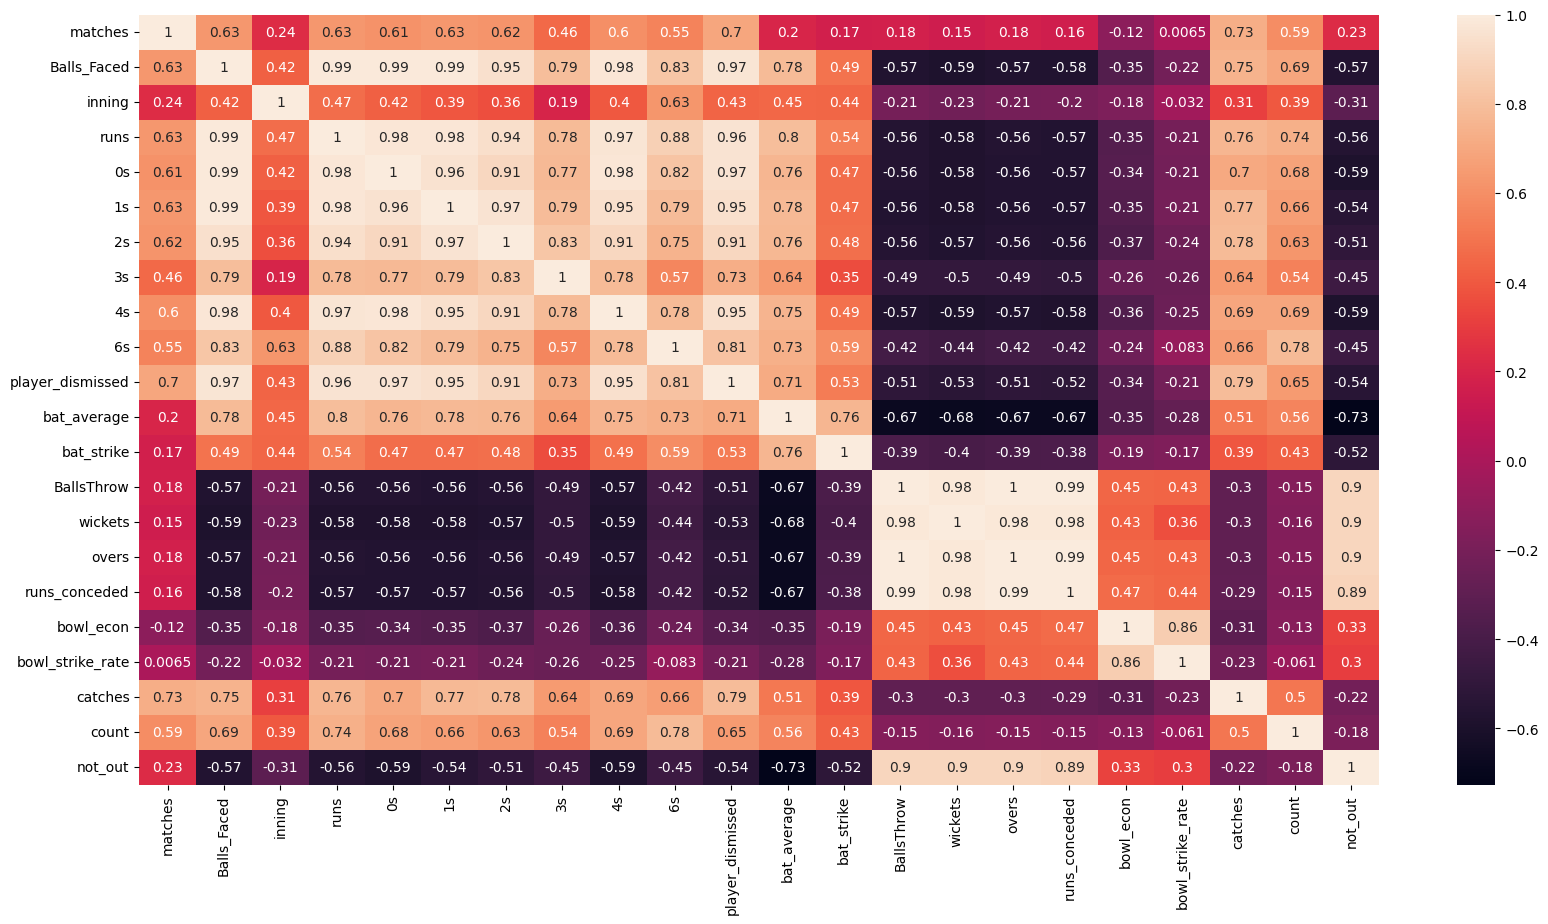

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [ ]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [ ]:
def correlation(dataframe, threshold):
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop


In [ ]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_dismissed',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)

In [ ]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head()

,matches,Balls_Faced,inning,bat_average,bat_strike,BallsThrow,bowl_econ,catches,count
A Mishra,147.0,410.0,2.0,12.27,89.76,3172.0,7.05,20.0,11.0
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.36,19.0,6.0
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.50,7.0,2.0
AB de Villiers,142.0,2977.0,3.0,42.58,148.74,0.0,0.00,93.0,20.0
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,51.0,7.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new),
    columns=top_columns.columns,
    index=final_df_new.index
)
scaled_data.head()

,matches,Balls_Faced,inning,bat_average,bat_strike,BallsThrow,bowl_econ,catches,count
A Mishra,1.471861,-0.721707,-0.511549,-0.873421,-0.981066,2.231153,0.368009,-0.606212,1.226993
A Nehra,-0.171646,-1.037329,-0.511549,-1.533014,-1.930766,1.005310,0.452741,-0.651038,0.147979
AB Dinda,-0.505919,-1.049154,-0.511549,-1.738733,-2.434091,0.611362,0.491008,-1.188945,-0.715232
AB de Villiers,1.332581,1.613167,1.406759,1.922699,1.288515,-1.014568,-1.558980,2.666054,3.169219
AC Gilchrist,-0.394495,0.319754,-0.511549,0.505727,0.684755,-1.013545,-1.558980,0.783380,0.363782


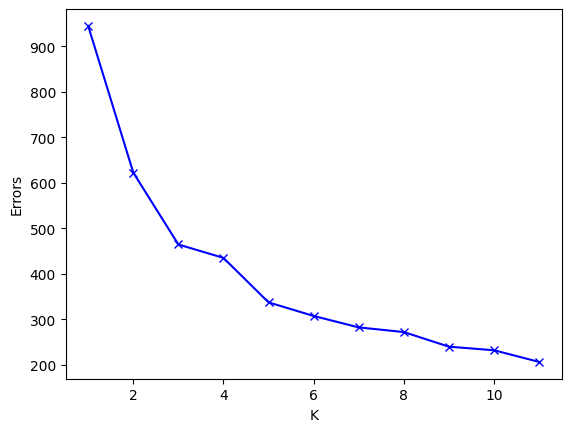

In [ ]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters,errors,'bx-')

In [ ]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

In [ ]:
final_df_new.head()

,matches,Balls_Faced,inning,bat_average,bat_strike,BallsThrow,bowl_econ,catches,count,cluster
A Mishra,147.0,410.0,2.0,12.27,89.76,3172.0,7.05,20.0,11.0,1
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.36,19.0,6.0,1
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.50,7.0,2.0,1
AB de Villiers,142.0,2977.0,3.0,42.58,148.74,0.0,0.00,93.0,20.0,0
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,51.0,7.0,2


In [ ]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])

In [ ]:
topPlayers_cluster

,PlayerNames,cluster
0,A Mishra,1
1,A Nehra,1
2,AB Dinda,1
3,AB de Villiers,0
4,AC Gilchrist,2
...,...,...
100,Y Venugopal Rao,3
101,YK Pathan,0
102,YS Chahal,1
103,Yuvraj Singh,3


In [ ]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [ ]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])

In [ ]:
TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

In [ ]:
TopPlayer_Dataset

,teams1,teams2,teams3,teams4
0,AB de Villiers,A Mishra,AC Gilchrist,AD Russell
1,AM Rahane,A Nehra,DA Miller,AJ Finch
2,AT Rayudu,AB Dinda,DPMD Jayawardene,AM Nayar
3,BB McCullum,B Kumar,KC Sangakkara,AR Patel
4,CH Gayle,DS Kulkarni,KK Nair,BJ Hodge
5,DA Warner,DW Steyn,KL Rahul,CH Morris
6,G Gambhir,Harbhajan Singh,KM Jadhav,DJ Bravo
7,KA Pollard,I Sharma,MA Agarwal,DJ Hussey
8,KD Karthik,Imran Tahir,MEK Hussey,DR Smith
9,MK Pandey,JD Unadkat,NV Ojha,F du Plessis


In [ ]:
inningScores = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
inningScores = inningScores[inningScores['inning']==1]
inningScores.head(10)

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
10,6,1,135
12,7,1,178
14,8,1,148
16,9,1,205
18,10,1,158


In [ ]:
inningScores['target'] = inningScores['total_runs'] + 1
inningScores.head(10)

,match_id,inning,total_runs,target
0,1,1,207,208
2,2,1,184,185
4,3,1,183,184
6,4,1,163,164
8,5,1,157,158
10,6,1,135,136
12,7,1,178,179
14,8,1,148,149
16,9,1,205,206
18,10,1,158,159


In [ ]:
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['winner'] = matches['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['team1'] = matches['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['team2'] = matches['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['winner'] = matches['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['team1'] = matches['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['team2'] = matches['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['winner'] = matches['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['team1'] = matches['team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['team2'] = matches['team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['team1'] = matches['team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['team2'] = matches['team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiants', 'Pune Warriors')


matches['team1'] = matches['team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['team2'] = matches['team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['team1'] = matches['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['team2'] = matches['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['winner'] = matches['winner'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [ ]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]

In [ ]:
matches = matches[matches['team1'].isin(teams2023)]
matches = matches[matches['team2'].isin(teams2023)]
matches = matches[matches['winner'].isin(teams2023)]

In [ ]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Chennai Super Kings', 'Rajasthan Royals'], dtype=object)

In [ ]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
matches.isnull().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
matches = matches[['id','city','team1','team2','winner']].dropna()
matches.head()

,id,city,team1,team2,winner
0,1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,3,Rajkot,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders
4,5,Bangalore,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore
5,6,Hyderabad,Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad
6,7,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians


In [ ]:
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
delivery['batting_team'] = delivery['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
delivery['batting_team'] = delivery['batting_team'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
delivery['batting_team'] = delivery['batting_team'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
delivery['batting_team'] = delivery['batting_team'].str.replace('Pune Warriorss', 'Pune Warriors')
delivery['batting_team'] = delivery['batting_team'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [ ]:
delivery = delivery[delivery['batting_team'].isin(teams2023)]
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
final = matches.merge(delivery, left_on='id', right_on='match_id')
final.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
final = final[final['inning']==2]
final.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
final['current_score'] = final.groupby('id')['total_runs'].cumsum()
final.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7


In [ ]:
final['balls_left'] = np.where(120 - final['over']*6 - final['ball']>=0,120 - final['over']*6 - final['ball'], 0)
final.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,balls_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,113
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,112
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,111
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,110
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,109


In [ ]:
final['wickets_left'] = 10 - final.groupby('id')['win_by_wickets'].cumsum()
final.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,balls_left,wickets_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,113,10
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,112,10
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,111,10
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,110,10
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,109,10


In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
final['result'] = final.apply(result, axis=1)
final.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,balls_left,wickets_left,current_run_rate
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,113,10,0.857143
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,112,10,0.750000
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,111,10,0.666667
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,110,10,1.800000
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,109,10,3.818182


In [ ]:
index1 = final[final['team2'] == final['batting_team']]['team1'].index
index2 = final[final['team1'] == final['batting_team']]['team2'].index
final.loc[index1, 'bowling_team'] = final.loc[index1, 'team1']
final.loc[index2, 'bowling_team'] = final.loc[index2, 'team2']
final.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,balls_left,wickets_left,current_run_rate
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,113,10,0.857143
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,112,10,0.750000
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,111,10,0.666667
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,110,10,1.800000
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,109,10,3.818182


In [ ]:
winningPred = final[['batting_team', 'bowling_team','city','balls_left','wickets_left','current_run_rate','result']]
winningPred.head()

,batting_team,bowling_team,city,balls_left,wickets_left,current_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,113,10,0.857143,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,112,10,0.750000,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,111,10,0.666667,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,110,10,1.800000,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,109,10,3.818182,0


In [ ]:
winningPred.sample()

,batting_team,bowling_team,city,balls_left,wickets_left,current_run_rate,result
126785,Royal Challengers Bangalore,Mumbai Indians,Bangalore,75,10,4.666667,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team','bowling_team','city'])
],
remainder = 'passthrough')

In [ ]:
from sklearn.model_selection import train_test_split
X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((86240, 6), (86240,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
pipe.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'col8', 'col9']
team2023 = pd.DataFrame(l,columns=columns)

In [ ]:
pipe.predict_proba(team2023)

array([[0.37, 0.63]])